In [15]:
import numpy as np

class NeuralNetwork():
    # Simple neural network implementation 

    W1 = None
    W2 = None
    W3 = None

    def __init__(self):
        pass

    def sigmoid(self, x):
        return (1 / (1+np.exp(-x)))

    def _activation(self, x):
        return self.sigmoid(x)
    
    def fit(self, X, y, lr=0.1, epochs=10000):
        mse_epochs=[]

        # X viene acostada..
        X=np.append(X, np.ones(shape=(X.shape[0],1)), axis=1)   # agrego columna para considerar ordenada al origen (parametro b)

        n = X.shape[0]  # nro de samples
        m = X.shape[1]  # nro de features + 1 (que agregamos antes)

        # Initialize weight with random
        W1 = np.random.random(size=(m,1))   # Pesos de neurona 1 capa (1)
        W2 = np.random.random(size=(m,1))   # Pesos de neurona 2 capa (1)
        W3 = np.random.random(size=(m,1))   # Pesos de neurona 1 capa (2)


        for j in range(epochs):

            # Shuffle de las muestras para mejorar entrenamiento
            idx = np.random.permutation(n)
            X = X[idx]
            y = y[idx]
            mse = 0     # Initialize MSE

            for i in range(n):

                # Forward propagation
                z1 = ( X[i,:]@W1 )[0]   # multiplico X por los pesos. Output = escalar
                a1 = self._activation(z1)

                z2 = ( X[i,:]@W2 )[0]   # multiplico X por los pesos. Output = escalar
                a2 = self._activation(z2)

                x1_2 = np.array([a1, a2, 1])    # Agrando vector para incorporar el b de la tercera neurona
                z3 = ( x1_2@W3 )[0]   # multiplico X por los pesos. Output = escalar
                a3 = self._activation(z3)

                prediction = a3

                # Compute the error
                error = y[i] - prediction
                mse = mse + np.power(error, 2)

                # Calculate the gradients
                common_grad = (-2/n) * error * self.sigmoid(z3) * (1-self.sigmoid(z3))
                grad_w3 = common_grad * x1_2 
                grad_w2 = common_grad * W3[1] * self.sigmoid(z2) * (1-self.sigmoid(z2)) * X[i,:]
                grad_w1 = common_grad * W3[0] * self.sigmoid(z1) * (1-self.sigmoid(z1)) * X[i,:]

                # Back propagation
                W3 = W3 - (lr * grad_w3[:,np.newaxis])
                W2 = W2 - (lr * grad_w2[:,np.newaxis])
                W1 = W1 - (lr * grad_w1[:,np.newaxis])

            mse_epochs.append(mse/n)
            if (j % (epochs/10)) == 0:
                print(f"Epoch {j} - MSE: {mse}")

        self.W1 = W1
        self.W2 = W2
        self.W3 = W3

        return mse_epochs


    def predict(self, X):
        X = np.append(X, np.ones(shape=(X.shape[0], 1)), axis=1)
        
        n = X.shape[0]  # nro de samples

        prediction = []

        for i in range(n):
            # Forward propagation
            z1 = ( X[i,:]@self.W1 )[0]   # multiplico X por los pesos. Output = escalar
            a1 = self._activation(z1)

            z2 = ( X[i,:]@self.W2 )[0]   # multiplico X por los pesos. Output = escalar
            a2 = self._activation(z2)

            x1_2 = np.array([a1, a2, 1])    # Agrando vector para incorporar el b de la tercera neurona
            z3 = ( x1_2@self.W3 )[0]   # multiplico X por los pesos. Output = escalar
            a3 = self._activation(z3)

            prediction.append(a3)

        return np.array(prediction)


X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0,1,1,0])

model = NeuralNetwork()
mse_epoch = model.fit(X,y, epochs=100000)

Epoch 0 - MSE: 1.475795699391404
Epoch 10000 - MSE: 0.4743171288483575
Epoch 20000 - MSE: 0.015199781982415365
Epoch 30000 - MSE: 0.006609162124844786
Epoch 40000 - MSE: 0.004139519572626363
Epoch 50000 - MSE: 0.002991149679612772
Epoch 60000 - MSE: 0.0023328253652263632
Epoch 70000 - MSE: 0.001907820279682192
Epoch 80000 - MSE: 0.001611521847662864
Epoch 90000 - MSE: 0.0013935190132182203


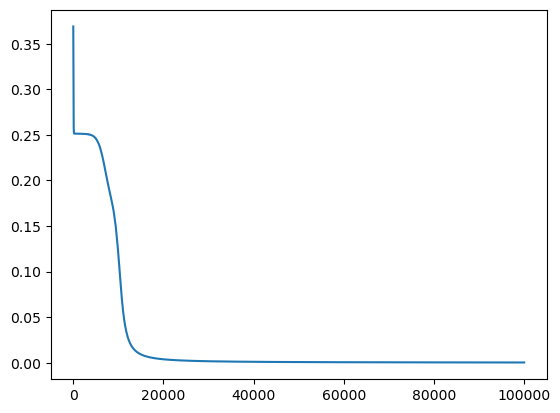

In [18]:
import matplotlib.pyplot as plt
plt.plot(mse_epoch)

In [19]:
print(model.predict(X))

[0.01931928 0.98333638 0.98333456 0.01725975]
